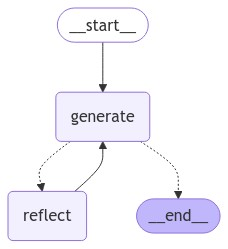

In [12]:

from langgraph.graph import MessageGraph, END
from IPython.display import Image, display

from langchain_core.messages import BaseMessage
from typing import List

builder = MessageGraph()
def generation_node(state: List[BaseMessage]):
    return state
def reflection_node(state: List[BaseMessage]):
    return state
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.set_entry_point("generate")


def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        return END
    return "reflect"

def generation_node(state: List[BaseMessage]):
    return state

builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
from dotenv import load_dotenv
load_dotenv()


from typing import List, Sequence

from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph

from chains import generate_chain, reflect_chain

REFLECT = "reflect"
GENERATE = "generate"

def generation_node(state: Sequence[BaseMessage]):
    """
    ツイート生成ノード。LangChainのgenerate_chainを使用してツイートを生成します。

    Args:
        state (Sequence[BaseMessage]): メッセージ履歴を含むシーケンス

    Returns:
        BaseMessage: 生成されたツイートを含むメッセージ
    """
    return generate_chain.invoke({'messages': state})

def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    res = reflect_chain.invoke({"messages": messages})
    return [HumanMessage(content=res.content)]

builder = MessageGraph()
builder.add_node(GENERATE, generation_node)
builder.add_node(REFLECT, reflection_node)

builder.set_entry_point(GENERATE)


def should_continue(state: List[BaseMessage]):
    if len(state):
        return END
    return REFLECT

builder.add_conditional_edges(GENERATE, should_continue)
builder.add_edge(REFLECT, GENERATE)

graph = builder.compile()

print(graph.get_graph().draw_mermaid())

if __name__ == '__main__':
    print("Hello LangGraph")

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	generate(generate)
	reflect(reflect)
	__end__([<p>__end__</p>]):::last
	__start__ --> generate;
	reflect --> generate;
	generate -.-> reflect;
	generate -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

Hello LangGraph


In [15]:
from dotenv import load_dotenv
load_dotenv()


from typing import List, Sequence

from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph

from chains import generate_chain, reflect_chain

REFLECT = "reflect"
GENERATE = "generate"

def generation_node(state: Sequence[BaseMessage]):
    """
    ツイート生成ノード。LangChainのgenerate_chainを使用してツイートを生成します。

    Args:
        state (Sequence[BaseMessage]): メッセージ履歴を含むシーケンス

    Returns:
        BaseMessage: 生成されたツイートを含むメッセージ
    """
    return generate_chain.invoke({'messages': state})

def reflection_node(messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    res = reflect_chain.invoke({"messages": messages})
    return [HumanMessage(content=res.content)]

builder = MessageGraph()
builder.add_node(GENERATE, generation_node)
builder.add_node(REFLECT, reflection_node)

builder.set_entry_point(GENERATE)


def should_continue(state: List[BaseMessage]):
    if len(state):
        return END
    return REFLECT

builder.add_conditional_edges(GENERATE, should_continue)
builder.add_edge(REFLECT, GENERATE)

graph = builder.compile()

print(graph.get_graph().draw_mermaid())
graph.get_graph().print_ascii()

if __name__ == '__main__':
    print("Hello LangGraph")

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	generate(generate)
	reflect(reflect)
	__end__([<p>__end__</p>]):::last
	__start__ --> generate;
	reflect --> generate;
	generate -.-> reflect;
	generate -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

          +-----------+            
          | __start__ |            
          +-----------+            
                *                  
                *                  
                *                  
          +----------+             
          | generate |             
          +----------+             
          ...        ...           
         .              .          
       ..                ..        
+---------+           +---------+  
| reflect |           | __end__ |  
+---------+           +---------+  
Hello LangGraph
